In [5]:
# notebook_setup.py-style block
import os, sys
from pathlib import Path

project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

print("Using project root:", project_root)

from src.process_data import save_returns_only

save_returns_only("../data/SPY_1Day.csv")

Using project root: C:\Users\ng4bo\OneDrive\Desktop\Alpaca Project\alpaca-bot-starter\alpaca-bot-starter
✅ Saved 702 rows → ..\data\SPY_1Day_returns_only.csv


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load returns data
df = pd.read_csv("../data/SPY_1Day_returns_only.csv", parse_dates=["ts"])
df = df.dropna().reset_index(drop=True)
series = df["return"]


In [8]:
model = ARIMA(series, order=(1,0,1))
fit = model.fit()
print(fit.summary())


                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  702
Model:                 ARIMA(1, 0, 1)   Log Likelihood                2245.750
Date:                Mon, 03 Nov 2025   AIC                          -4483.499
Time:                        22:24:22   BIC                          -4465.284
Sample:                             0   HQIC                         -4476.459
                                - 702                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.000      2.318      0.020       0.000       0.002
ar.L1         -0.9908      0.013    -77.840      0.000      -1.016      -0.966
ma.L1          0.9276      0.019     49.620      0.0

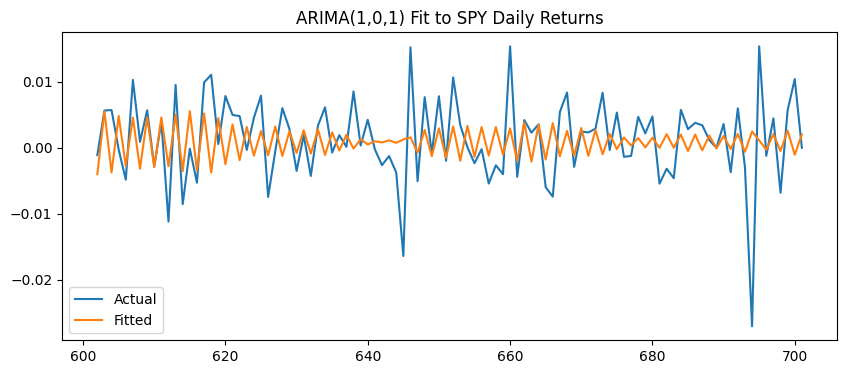

In [9]:
plt.figure(figsize=(10,4))
plt.plot(series[-100:], label="Actual")
plt.plot(fit.predict(start=len(series)-100, end=len(series)-1), label="Fitted")
plt.title("ARIMA(1,0,1) Fit to SPY Daily Returns")
plt.legend()
plt.show()


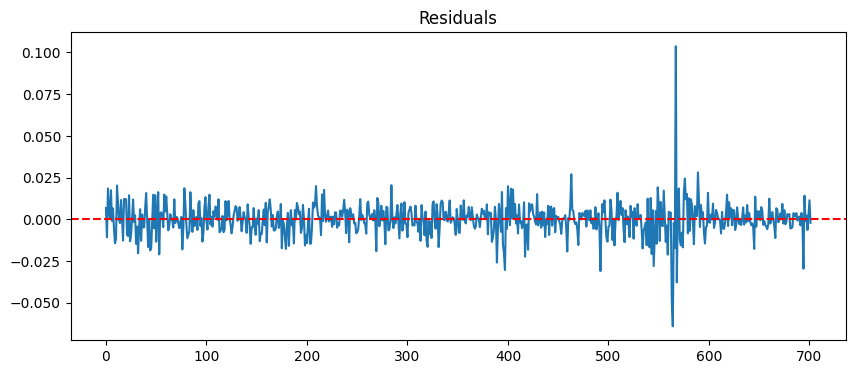

Mean residual: 5.631130126411255e-06
Residual std dev: 0.009880390731882295


In [10]:
resid = fit.resid
plt.figure(figsize=(10,4))
plt.plot(resid)
plt.title("Residuals")
plt.axhline(0, color="red", linestyle="--")
plt.show()

# Basic checks
print("Mean residual:", resid.mean())
print("Residual std dev:", resid.std())


In [11]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series)
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -15.126613447703406
p-value: 7.331278162831892e-28
